In [17]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [19]:
# PROBLEM SET: NO. 1
df1 = df.copy()
df_exploded = df1.explode("job_skills")

In [20]:
df_exploded
df_counts = df_exploded.groupby(["job_title_short", "job_skills"]).size()
df_counts = df_counts.reset_index(name = "skill_count")
df_counts = df_counts.sort_values(by="skill_count", ascending = False)

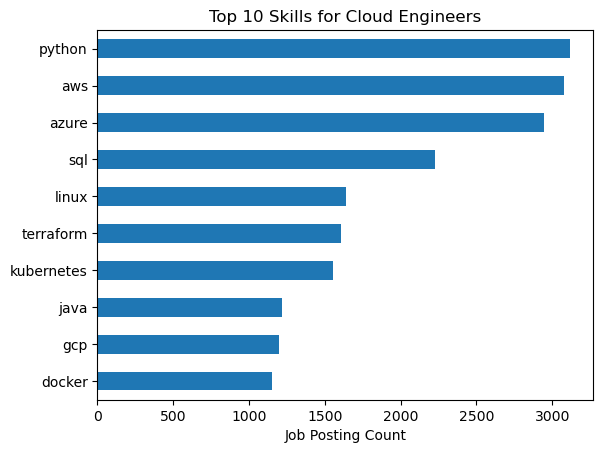

In [27]:
job_title = "Cloud Engineer"
skill_no = 10
df_counts_final = df_counts[df_counts["job_title_short"] == job_title].head(skill_no)
df_counts_final.plot(kind="barh", x = "job_skills", y = "skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {skill_no} Skills for {job_title}s")
plt.legend().set_visible(False)
plt.ylabel("")
plt.xlabel("Job Posting Count")
plt.show()

In [36]:
# PROBLEM SET: NO. 2
df2 = df.copy()
df_exploded2 = df2.explode("job_skills")
df_exploded_sal = df_exploded2.groupby("job_skills")["salary_year_avg"].mean()
df_sal_counts = df_exploded_sal.reset_index(name="average_salary")
df_sal_counts = df_sal_counts.sort_values(by="average_salary", ascending=False)

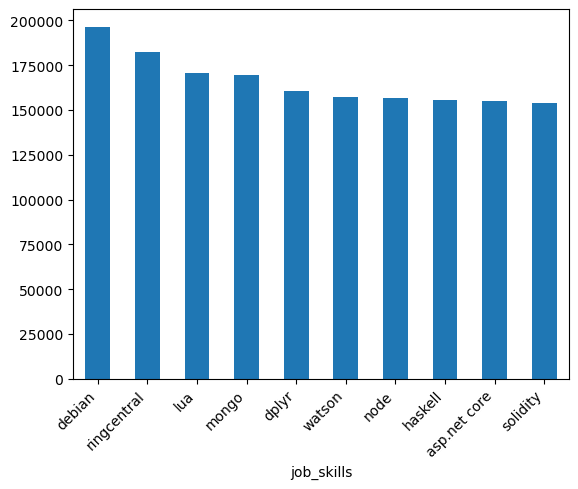

In [43]:
skill_rank = 10
df_sal_final = df_sal_counts.head(skill_rank)
df_sal_final.plot(kind="bar", x = "job_skills", y = "average_salary")
plt.legend().set_visible(False)
plt.xticks(rotation=45, ha="right")
plt.show()


Help on function xticks in module matplotlib.pyplot:

xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    minor : bool, default: False
        If ``False``, get/set the major ticks/labels; if ``True``, the minor
        ticks/labels.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
        .. warning::
    
            This only sets the properties of the current ticks, 

In [49]:
# PROBLEM SET: NO. 3
df3 = df.copy()
unique = df3["job_skills"].explode().dropna().unique()
unique
len(unique)
# Remember: if you don't put dropna(), you will get a total of 253 because None will be counted! 


252